# Adding Dependences

In [3]:
using DelimitedFiles
using Plots
include("../../init/extract_info.jl")

corr_data (generic function with 1 method)

# Rotating final conditions

In [4]:
k = 0.3
id = Float64.(readdlm("T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Initial.xyz")[3:end,1])
X_f = Float64.(readdlm("T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Final.xyz")[3:end,2:4])
X_f_n = corr_data(X_f)

p1 = scatter(
    X_f[:,2], 
    X_f[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    # xticks = 0:pi/4:2*pi
)

p2 = scatter(
    X_f[:,3], 
    X_f[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
    # xticks = 0:pi/4:2*pi
)
p3 = scatter(
    X_f_n[:,2], 
    X_f_n[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    # xticks = 0:pi/4:2*pi
)

p4 = scatter(
    X_f_n[:,3], 
    X_f_n[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
    # xticks = 0:pi/4:2*pi
)
plot!(p1, p2,p3,p4,
    size=(1200,1200),
    title=["Z Axis(Before)" "Y Axis(Before)" "Z Axis(After)" "Y Axis(After)"],
    layout = 4
)

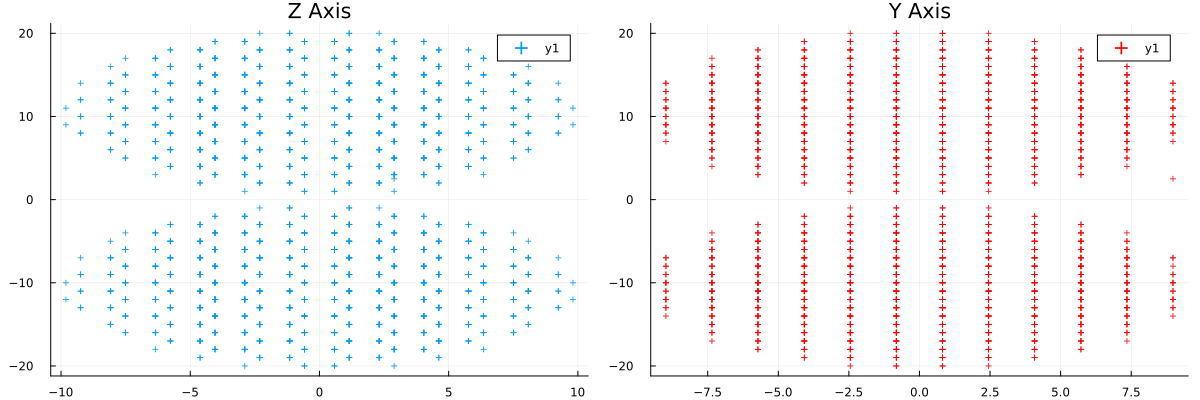

In [5]:
X_o = Float64.(readdlm("T_150000/rmax_3.5_s_1.9/k_$(k)/Test_Initial.xyz")[3:end,2:4])
p1 = scatter(
    X_o[:,2], 
    X_o[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    # xticks = 0:pi/4:2*pi
)

p2 = scatter(
    X_o[:,3], 
    X_o[:,1],  
    shape=[:+ :o :utri], 
    markersize=3,
    mc=:red,
    # xticks = 0:pi/4:2*pi
)

plot!(p1, p2,
    size=(1200,400),
    title=["Z Axis" "Y Axis"]
)

In [6]:
open("TEST_Rotate.xyz"; write=true) do f
    write(f, "$(size(X_f_n, 1))\n")
    write(f, "Rotate Testing\n")
    writedlm(f,hcat(id, X_f_n), ' ')
end